In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

Data Back Ground:
Label Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [5]:
f_train = pd.read_csv('../data/fashion-mnist_train.csv')

In [6]:
f_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [4]:
f_train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [13]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
f_train['label'].nunique()

10

6,000 images associated with each label, for a total of 10 * 6000 = 60000 pictures.

In [15]:
f_train.groupby(['label']).sum()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
0,8,95,863,1996,2732,4356,9823,32618,91945,198455,...,543528,479503,377969,159348,39644,11207,4581,1926,731,244
1,0,2,4,39,1036,2439,6540,18157,51636,197833,...,379520,114391,38647,16682,9848,4993,1460,627,262,4
2,0,37,238,633,1652,2791,6202,22231,67725,172703,...,114111,101638,100194,271267,494213,417924,189641,45310,7054,559
3,16,16,21,35,777,2157,5520,12127,30757,129887,...,404532,216316,82634,24044,7594,2506,573,187,47,68
4,4,4,46,141,722,915,1677,3821,8813,26566,...,164260,102148,68182,256028,421534,331415,131662,20851,3165,151
5,0,0,0,0,16,16,18,28,159,259,...,2187,2367,3887,9123,15460,16929,20523,22177,9814,323
6,20,61,515,1847,4865,7209,12694,35616,81789,133864,...,247167,165359,114869,137786,202671,155511,74206,15629,3350,380
7,0,0,0,0,0,0,0,0,0,0,...,68,60,65,69,79,71,81,112,118,0
8,6,94,373,1365,3018,4744,5808,7235,8022,9572,...,219364,210152,194456,170122,132504,84138,45613,25962,10600,1255


In [9]:
# examining the visual input 
# normalize dividing by 255
train_input = f_train.iloc[:,1:] / 255
train_input.head(4)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0


In [11]:
# Save the label(in 0-9 format) as 'target'
labels_ftrain = f_train[['label']].iloc[:, :]

# Check the shape of the label/category
print('Shape of the input label', labels_ftrain.shape)

# Preview a few rows
labels_ftrain.head()

Shape of the input label (60000, 1)


,label
0,2
1,9
2,6
3,0
4,3


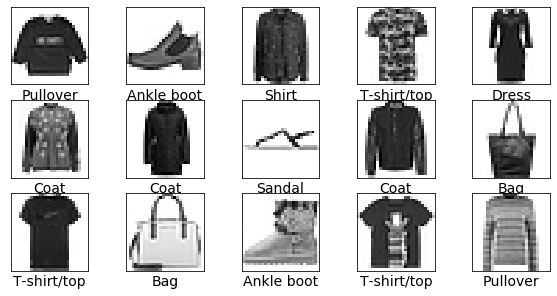

In [14]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(15):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(train_input.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label_names[labels_ftrain.label.iloc[i]])